In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

#Time Series Analysis Analogy - closing price dependent on previous (100) days
#LSTM (Long-Short-Term-Memory Model)
#Web app using that
#Frameworks: Numpy, Pandas, Matplotlib, Keras, Tensorflow, Scikit-learn
#Resources
## https://www.youtube.com/watch?v=s3CnE2tqQdo
## https://www.youtube.com/watch?v=QIUxPv5PJOY
## https://medium.com/the-handbook-of-coding-in-finance/stock-prices-prediction-using-long-short-term-memory-lstm-model-in-python-734dd1ed6827#:~:text=Save-,Stock%20Prices%20Prediction%20Using%20Long%20Short,Memory%20(LSTM)%20Model%20in%20Python&text=Long%20Short%2DTerm%20Memory%20(LSTM)%20is%20one%20type%20of,useful%20in%20predicting%20stock%20prices.

In [4]:
# Get the stock quote
start = '2016-01-01'
end = '2022-08-08'
df = data.DataReader('TSLA', 'yahoo', start, end)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,46.276001,43.799999,46.144001,44.681999,34135500.0,44.681999
2016-01-05,45.377998,44.000000,45.271999,44.686001,15934000.0,44.686001
2016-01-06,44.009998,43.195999,44.000000,43.807999,18895500.0,43.807999
2016-01-07,43.688000,42.734001,42.838001,43.130001,17771500.0,43.130001
2016-01-08,44.088001,42.153999,43.571999,42.200001,18140500.0,42.200001
...,...,...,...,...,...,...
2022-08-02,923.500000,878.000000,882.010010,901.760010,31859200.0,901.760010
2022-08-03,928.650024,903.450012,915.000000,922.190002,26697000.0,922.190002
2022-08-04,940.820007,915.000000,933.000000,925.900024,24085400.0,925.900024


In [5]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2016-01-04,46.276001,43.799999,46.144001,44.681999,34135500.0,44.681999
1,2016-01-05,45.377998,44.000000,45.271999,44.686001,15934000.0,44.686001
2,2016-01-06,44.009998,43.195999,44.000000,43.807999,18895500.0,43.807999
3,2016-01-07,43.688000,42.734001,42.838001,43.130001,17771500.0,43.130001
4,2016-01-08,44.088001,42.153999,43.571999,42.200001,18140500.0,42.200001


In [6]:
#df = df.drop(['Date','Adj Close'], axis=1)

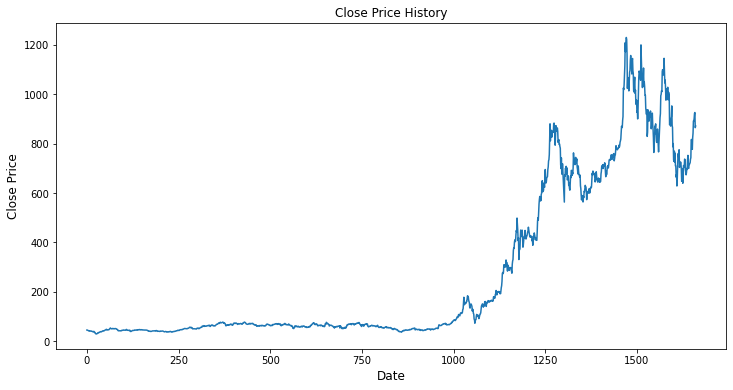

In [7]:
#Visualize the closing price
plt.figure(figsize = (12,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.show()

In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1656    827.686599
1657    828.525499
1658    829.830999
1659    830.812399
1660    831.506199
Name: Close, Length: 1661, dtype: float64

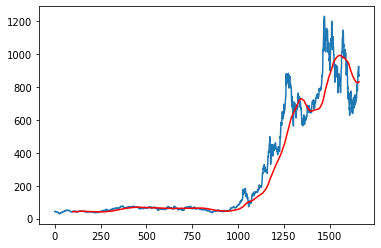

In [9]:
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.show()

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1656    910.245998
1657    910.641798
1658    910.920748
1659    910.921948
1660    910.949298
Name: Close, Length: 1661, dtype: float64

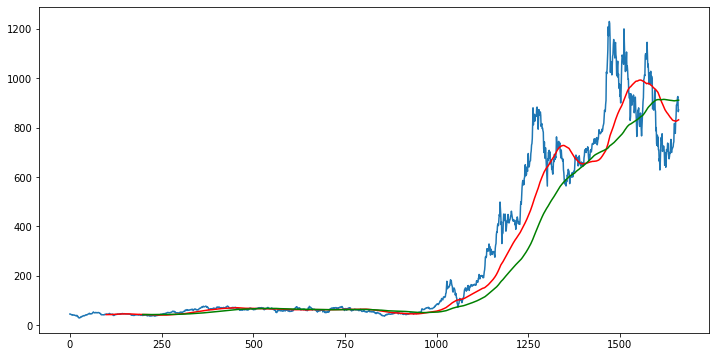

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.show()

In [12]:
#Get the number of rows and columns in the data set
df.shape

(1661, 7)

In [13]:
# Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)]) 
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

# Number of rows to train and test the data on
print(data_training.shape)
print(data_testing.shape)

(1162, 1)
(499, 1)


In [14]:
data_training.head()

,Close
0,44.681999
1,44.686001
2,43.807999
3,43.130001
4,42.200001


In [15]:
data_testing.head()

,Close
1162,330.141998
1163,367.127991
1164,377.417999
1165,375.705994
1166,400.365997


In [16]:
from sklearn.preprocessing import MinMaxScaler

#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
# Training Data 

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.05318375],
       [0.0531971 ],
       [0.05026912],
       ...,
       [0.8208466 ],
       [0.94114701],
       [0.9853268 ]])

In [18]:
data_training_array.shape

(1162, 1)

In [43]:
x_train = [] # empty list for a sequence of feature data
y_train = [] # empty list for a squence of label data 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i - 100: i, 0])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train) #form accepted by Tensorflow when training data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)
print(y_train.shape)

(1062, 100, 1)
(1062,)


In [20]:
# ML Model

In [21]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [23]:
model = Sequential()
model.add(LSTM(50, activation = 'relu', return_sequences = True, 
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [24]:
# Compiling the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#Training the model
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
34/34 [==============================] - 12s 200ms/step - loss: 0.0238
Epoch 2/50
34/34 [==============================] - 8s 222ms/step - loss: 0.0137
Epoch 3/50
34/34 [==============================] - 8s 222ms/step - loss: 0.0069
Epoch 4/50
34/34 [==============================] - 6s 187ms/step - loss: 0.0050
Epoch 5/50
34/34 [==============================] - 6s 184ms/step - loss: 0.0041
Epoch 6/50
34/34 [==============================] - 6s 183ms/step - loss: 0.0041
Epoch 7/50
34/34 [==============================] - 7s 203ms/step - loss: 0.0052
Epoch 8/50
34/34 [==============================] - 8s 223ms/step - loss: 0.0041
Epoch 9/50
34/34 [==============================] - 7s 204ms/step - loss: 0.0038
Epoch 10/50
34/34 [==============================] - 7s 203ms/step - loss: 0.0037
Epoch 11/50
34/34 [==============================] - 6s 189ms/step - loss: 0.0044
Epoch 12/50
34/34 [==============================] - 7s 196ms/step - loss: 0.0034
Epoch 13/50
34/34 [=====

In [25]:
model.save('keras_model.h5')

In [26]:
data_testing.head()

,Close
1162,330.141998
1163,367.127991
1164,377.417999
1165,375.705994
1166,400.365997


In [ ]:
# Appending past 100 days of training data to testing data, and then scaling it

In [31]:
past_100_days = data_training.tail(100)

In [32]:
test_data = past_100_days.append(data_testing, ignore_index=True)

/var/folders/94/jb_ngtrx5rbbhmg81lhdzck80000gn/T/ipykernel_64116/824681900.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_data = past_100_days.append(data_testing, ignore_index=True)


In [34]:
testing_data_array = scaler.fit_transform(test_data)
testing_data_array

array([[0.00887257],
       [0.01488653],
       [0.01293924],
       [0.0105161 ],
       [0.00836863],
       [0.01220879],
       [0.00475674],
       [0.        ],
       [0.00448457],
       [0.01084621],
       [0.01597519],
       [0.01657044],
       [0.0208127 ],
       [0.03449996],
       [0.04484924],
       [0.04835051],
       [0.05105109],
       [0.05257521],
       [0.05125301],
       [0.04078081],
       [0.04875085],
       [0.04410123],
       [0.04752874],
       [0.06045218],
       [0.05524945],
       [0.06076122],
       [0.05748998],
       [0.04334444],
       [0.05385702],
       [0.05508966],
       [0.05761289],
       [0.05716688],
       [0.06408163],
       [0.06265408],
       [0.06232397],
       [0.05908433],
       [0.06125638],
       [0.06052593],
       [0.06306496],
       [0.06207815],
       [0.06340385],
       [0.06551796],
       [0.06363564],
       [0.06398506],
       [0.06422386],
       [0.06169185],
       [0.06681732],
       [0.077

In [35]:
testing_data_array.shape

(599, 1)

In [ ]:
# Testing Data

In [42]:
x_test = [] # feature data
y_test= []  # label data

for i in range(100, testing_data_array.shape[0]):
    x_test.append(testing_data_array[i-100: i])
    y_test.append(testing_data_array[i, 0])
    
x_test, y_test = np.array(x_test), np.array(y_test)
x_train = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape)
#print(x_test)
print(y_test.shape)

(499, 100, 1)
(499,)


In [45]:
# Making Predictions

y_predicted = model.predict(x_test)
y_predicted.shape

16/16 [==============================] - 1s 75ms/step


(499, 1)

In [47]:
scaler.scale_

array([0.00087795])

In [48]:
scale_factor = 1/0.00087795
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor


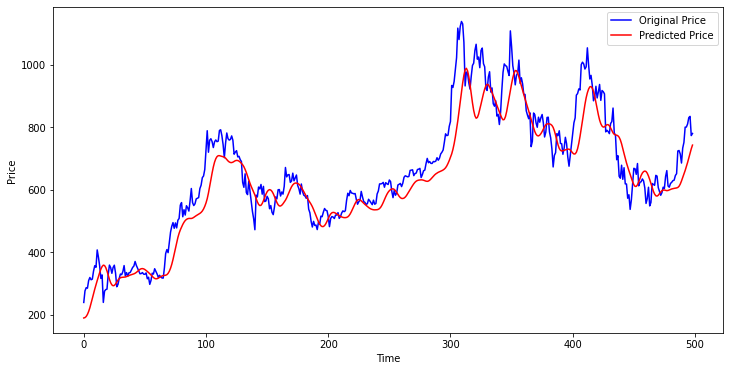

In [50]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label="Original Price")
plt.plot(y_predicted, 'r', label="Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()